# Machine Learning Project

First Competition, Predict Diamond Price - SHAI Training for AI <br>
Submitted by: Team 1 | Group 11 <br>
The members: Taiba Seddeq, Bayan Nakrash, Aya Nzha<br>
Sep.,2022

# 1. Looking to the big Picture

### Framing the problem & Assumptions

The dataset used is 'Diamond Price Prediction', so It is required to construct a ML model that predicts the prices of diamond. <br>
This is considered as a Regression Task.<br>
This machine learning project will use Supervised Learning algorithms and models ( Linear Regression, Decision Trees, Random Forests), evaluate them and estimate the best model.

# 2. Getting the Data

In [ ]:
#setting-up Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [ ]:
TrainSet= pd.read_csv('train.csv')
TestSet= pd.read_csv('test.csv')

# 3. Discovering & visualizing the Data Structure

### A Quick Look at the Data Structure

In [ ]:
TrainSet.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


_______________________________________________________________________________
Columns Content: <br>
carat - weight of the diamond (0.2--5.01) <br>
cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal) <br>
color - diamond colour, from J (worst) to D (best) <br>
clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) <br>
depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) <br>
table - width of top of diamond relative to widest point (43--95) <br>
price - price in US dollars (\$326--\$18,823) <br>
x - length in mm (0--10.74) <br>
y - width in mm (0--58.9) <br>
z - depth in mm (0--31.8) <br>
_______________________________________________________________________________

In [ ]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
TrainSet.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
NumTrain = TrainSet.drop(['Unnamed: 0','cut','color','clarity'], axis=1)
CatTrain= TrainSet[['cut','color','clarity']]

In [ ]:
NumTrain.head()

,carat,depth,table,price,x,y,z
0,0.21,59.8,61.0,326,3.89,3.84,2.31
1,0.29,62.4,58.0,334,4.20,4.23,2.63
2,0.31,63.3,58.0,335,4.34,4.35,2.75
3,0.24,62.8,57.0,336,3.94,3.96,2.48
4,0.24,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
CatTrain.head()

,cut,color,clarity
0,Premium,E,SI1
1,Premium,I,VS2
2,Good,J,SI2
3,Very Good,J,VVS2
4,Very Good,I,VVS1


In [ ]:
for col in CatTrain.columns:
  print(col,CatTrain[col].unique(),', the values number =',CatTrain[col].nunique())

cut ['Premium' 'Good' 'Very Good' 'Fair' 'Ideal'] , the values number = 5
color ['E' 'I' 'J' 'F' 'H' 'D' 'G'] , the values number = 7
clarity ['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF'] , the values number = 8


### Visualizing Data: 

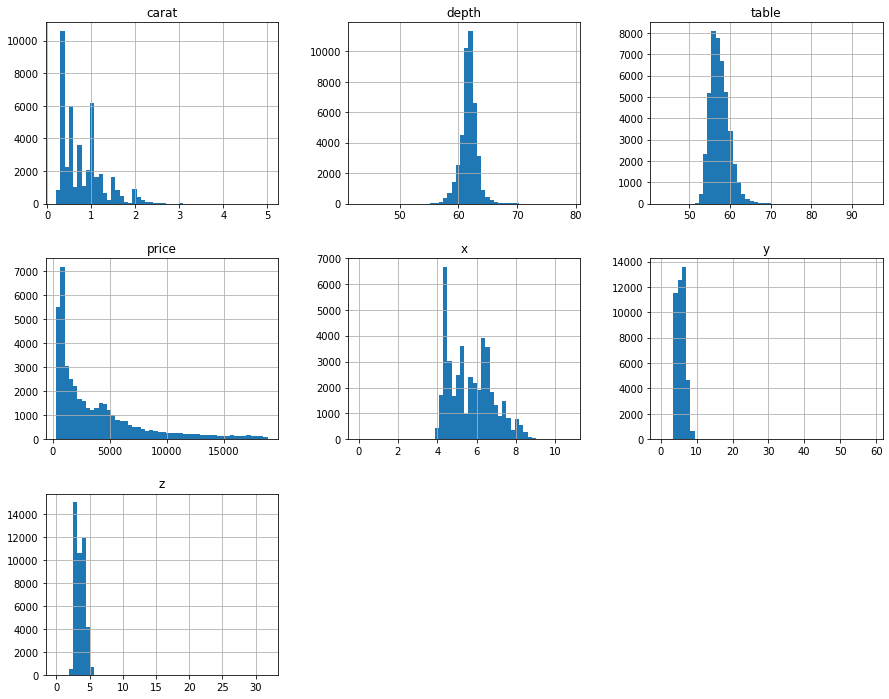

In [ ]:
NumTrain.hist(bins=50, figsize=(15,12))
plt.show()

This figure shows where the values are centered and how many they are.
________________________________________________________________________________

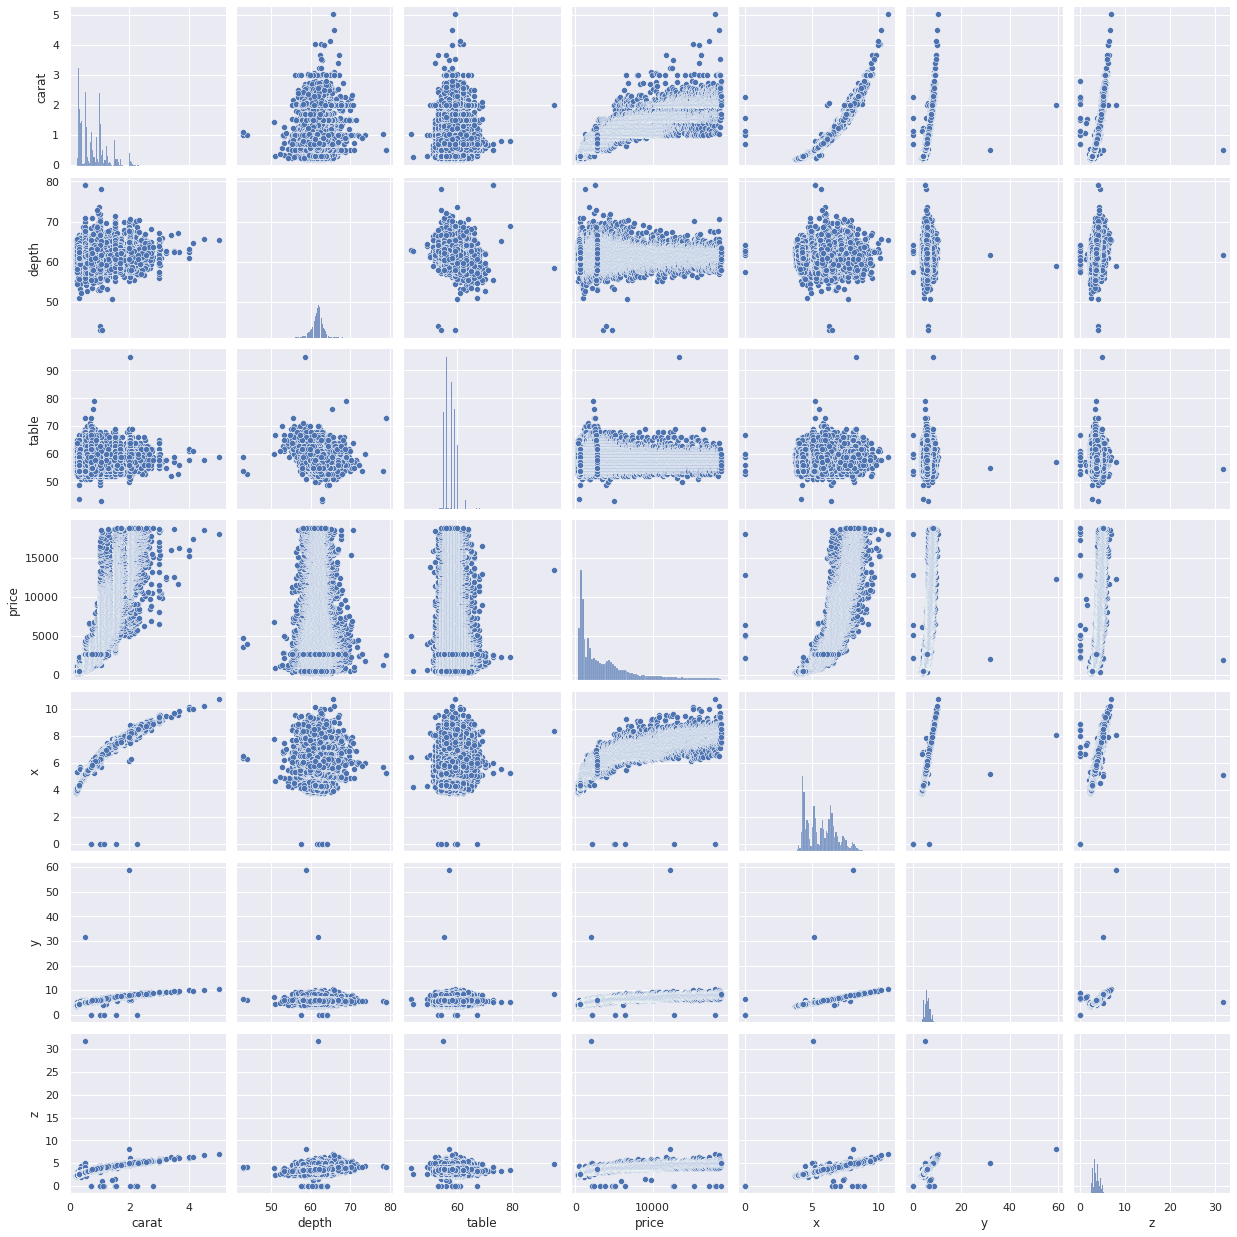

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.pairplot(NumTrain)

The figure shows the relation between each column with the others.
we can conclude the following: <br>
- price is clearly proportional with x, y, z, carat <br>
- carat has a strong positive relationship with x, y, z <br>
- depth and table have a weak relationship with price and other attributes <br>
______________________________________________________________________________


<AxesSubplot:>

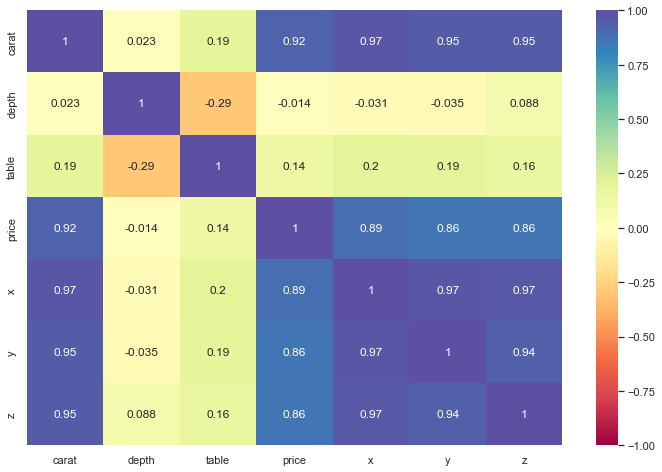

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(NumTrain.corr(),cmap="Spectral",vmax=1,vmin=-1,center=0,annot=True)

In [ ]:
corr=NumTrain.corrwith(NumTrain.price)
corr.sort_values(ascending=False)

price    1.000000
carat    0.923801
x        0.887483
y        0.863748
z        0.860625
table    0.136975
depth   -0.014393
dtype: float64

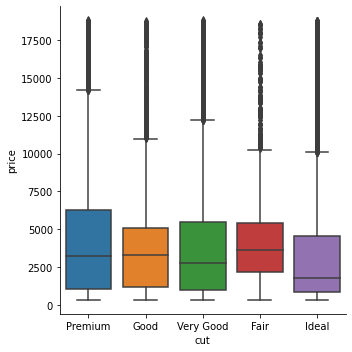

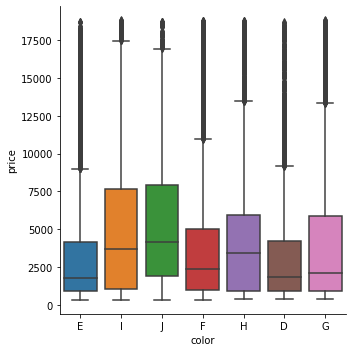

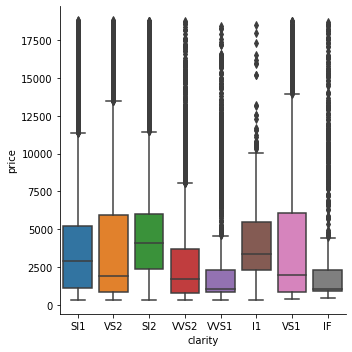

In [ ]:
for col in CatTrain:
  sns.catplot(data=TrainSet, x=col, y="price", kind="box")

### Categorical encoding for categorical features:

In [ ]:
oe = OrdinalEncoder(categories=[['Ideal','Premium','Very Good','Good','Fair'],
                                ['D','E','F','G','H','I','J'],
                                ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']])
CatEncoded = oe.fit_transform(CatTrain)
CatEncoded

array([[1., 1., 5.],
       [1., 5., 4.],
       [3., 6., 6.],
       ...,
       [3., 0., 5.],
       [1., 4., 6.],
       [0., 0., 6.]])

In [ ]:
toplot= pd.DataFrame(CatEncoded)
toplot['price']= TrainSet['price']
toplot

,0,1,2,price
0,1.0,1.0,5.0,326
1,1.0,5.0,4.0,334
2,3.0,6.0,6.0,335
3,2.0,6.0,2.0,336
4,2.0,5.0,1.0,336
...,...,...,...,...
43035,1.0,0.0,5.0,2757
43036,0.0,0.0,5.0,2757
43037,3.0,0.0,5.0,2757
43038,1.0,4.0,6.0,2757


In [ ]:
toplot.rename(columns = {0:'cut', 1:'color', 2:'clarity'}, inplace = True)
toplot

,cut,color,clarity,price
0,1.0,1.0,5.0,326
1,1.0,5.0,4.0,334
2,3.0,6.0,6.0,335
3,2.0,6.0,2.0,336
4,2.0,5.0,1.0,336
...,...,...,...,...
43035,1.0,0.0,5.0,2757
43036,0.0,0.0,5.0,2757
43037,3.0,0.0,5.0,2757
43038,1.0,4.0,6.0,2757


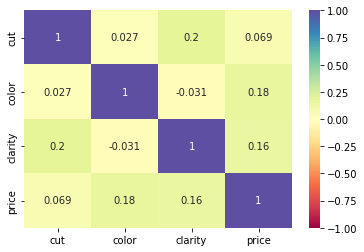

In [ ]:
sns.heatmap(toplot.corr(),cmap="Spectral",vmax=1,vmin=-1,center=0,annot=True)

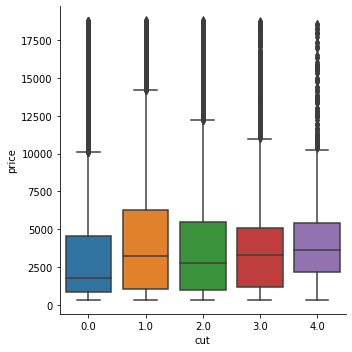

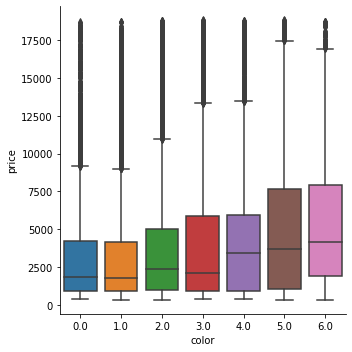

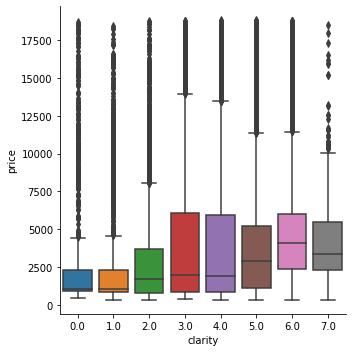

In [ ]:
df= pd.DataFrame(CatEncoded)
df.rename(columns = {0:'cut', 1:'color', 2:'clarity'}, inplace = True)
for col in df:
  sns.catplot(data=toplot, x=col, y="price", kind="box")

We can notice that the highest orders of the features aren't available in low prices. Also some middle oder of the features have high prices, maybe this deppend on the other features of the diamond, such as carat or dimensions.
Lastly, the attributes have a lot of outliers.

# 4. Prepareing the Data for Machine Learning Algorithms

### Cleaning Data:

In [ ]:
TrainSet.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

trainset doesn't have any NaN values.
_____________________________________________________________________

In [ ]:
(TrainSet==0).sum()

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              7
y              6
z             17
dtype: int64

trainset has some zeros in x, y, z columns.
we decide to replace them with the median values.
_________________________________________________________________

In [ ]:
(NumTrain==0).sum()

carat     0
depth     0
table     0
price     0
x         7
y         6
z        17
dtype: int64

In [ ]:
si=SimpleImputer(missing_values=0.0,strategy="median")
dfnozeros= si.fit_transform(NumTrain)


In [ ]:
(dfnozeros==0).sum()

0

### Splitting the predictors & the Label

In [ ]:
Xtrain = TrainSet[['carat','x','y','z','cut','color','clarity']]
ytrain = TrainSet["price"].copy()

In [ ]:
Xtrain.head()

,carat,x,y,z,cut,color,clarity
0,0.21,3.89,3.84,2.31,Premium,E,SI1
1,0.29,4.20,4.23,2.63,Premium,I,VS2
2,0.31,4.34,4.35,2.75,Good,J,SI2
3,0.24,3.94,3.96,2.48,Very Good,J,VVS2
4,0.24,3.95,3.98,2.47,Very Good,I,VVS1


In [ ]:
Xnumtrain=Xtrain[['carat','x','y','z']]
Xnumtrain

,carat,x,y,z
0,0.21,3.89,3.84,2.31
1,0.29,4.20,4.23,2.63
2,0.31,4.34,4.35,2.75
3,0.24,3.94,3.96,2.48
4,0.24,3.95,3.98,2.47
...,...,...,...,...
43035,0.72,5.69,5.73,3.58
43036,0.72,5.75,5.76,3.50
43037,0.72,5.69,5.75,3.61
43038,0.86,6.15,6.12,3.74


### Pipeline the Predictors

In [ ]:
pl= Pipeline([ ('imputer', SimpleImputer(missing_values=0,strategy="median")) , ('std_scaler', StandardScaler()) ])
prepared = pl.fit_transform(Xnumtrain)
prepared

array([[-1.21915997, -1.623981  , -1.63168005, -1.72382087],
       [-1.05299496, -1.34967559, -1.29479163, -1.27379643],
       [-1.01145371, -1.22579572, -1.19113366, -1.10503727],
       ...,
       [-0.15985805, -0.0312399 ,  0.01820939,  0.10440339],
       [ 0.13093071,  0.37579393,  0.33782148,  0.28722582],
       [-0.09754617,  0.09263996,  0.12186736,  0.14659318]])

The Full-Pipeline, for Num. & Cat. Attributes:

In [ ]:
NumAttribs=list(Xnumtrain)
CatAttribs=list(CatTrain)

full_pipeline = ColumnTransformer([
 ("num", pl, NumAttribs),
 ("cat", oe, CatAttribs) ])

Xtrain_prepared = full_pipeline.fit_transform(Xtrain)

# 5. Selecting and Training a Model

### 1. Linear Regression:

In [ ]:
lr = LinearRegression()
lr.fit(Xtrain_prepared , ytrain)

LinearRegression()

In [ ]:
#Display model's parameters
print('Bias:', lr.intercept_)
print('Weights:', lr.coef_)

Bias: 6915.490510499884
Weights: [5058.44303894 -755.41193037   89.36520173 -220.25648454 -152.23704692
 -315.92973435 -503.56610995]


### 2. Decision Tree:

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(Xtrain_prepared , ytrain)

DecisionTreeRegressor()

### 3. Random Forest:

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain_prepared , ytrain)

RandomForestRegressor()

### 4. SVM

In [ ]:
svr= svm.SVR()
svr.fit(Xtrain_prepared, ytrain)

SVR()

### 5. Knn

In [ ]:
knn = KNeighborsRegressor()
knn.fit(Xtrain_prepared, ytrain)

KNeighborsRegressor()

# 6. Evaluate the Models using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

### 1. Linear Regression:

In [ ]:
lr_scores = cross_val_score(lr, Xtrain_prepared , ytrain, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)
print('Scores:',lr_rmse_scores,'\nMean:',lr_rmse_scores.mean(),'\nStandard Deviation:',lr_rmse_scores.std())

Scores: [ 955.8203362   900.80821155 1077.96661744 1481.76203354 2647.33934374
 1913.72884538  827.42201004  876.51655766  635.91569666  855.07693942] 
Mean: 1217.2356591621012 
Standard Deviation: 593.7398168180572


### 2. Decision Tree:

In [ ]:
dtr_scores = cross_val_score(dtr, Xtrain_prepared , ytrain, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)
print('Scores:',dtr_rmse_scores,'\nMean:',dtr_rmse_scores.mean(),'\nStandard Deviation:',dtr_rmse_scores.std())

Scores: [ 651.92480354  794.59460582 1021.43909819 1632.63935448 3082.21252751
 1386.70260419  175.72524548  244.47511913  337.12288807  524.41837167] 
Mean: 985.1254618077588 
Standard Deviation: 834.4342974941209


### 3. Random Forest:

In [ ]:
rfr_scores = cross_val_score(rfr, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)
print('Scores:',rfr_rmse_scores,'\nMean:',rfr_rmse_scores.mean(),'\nStandard Deviation:',rfr_rmse_scores.std())

Scores: [ 502.57446219  552.4363221   771.23748625 1232.67437416 2483.61846326
 1252.60262695  132.80697492  194.790319    250.87222555  384.03361033] 
Mean: 775.7646864718405 
Standard Deviation: 682.4460070697961


4. SVM

In [ ]:
svr_scores = cross_val_score(svr, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
print('Scores:',svr_rmse_scores,'\nMean:',svr_rmse_scores.mean(),'\nStandard Deviation:',svr_rmse_scores.std())

Scores: [ 507.82022493  459.11823589 1043.06744033 2713.79104663 7057.74172866
 4616.02224936  388.32602526  452.48798386  377.78746674  536.56161818] 
Mean: 1815.272401983789 
Standard Deviation: 2188.0294208211826


### 5. Knn

In [55]:
knn_scores = cross_val_score(knn, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
print('Scores:',knn_rmse_scores,'\nMean:',knn_rmse_scores.mean(),'\nStandard Deviation:',knn_rmse_scores.std())

Scores: [ 603.69491684  625.16046243  898.94239618 1445.98349558 2653.95380312
 1401.74090543  163.98500867  244.79951525  281.81602811  519.61157136] 
Mean: 883.9688102971752 
Standard Deviation: 726.9671919245202


# 7. Fine-Tune the Model

<b>Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,10,40,90], 'max_features': np.arange(1,200,10)},    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(Xtrain_prepared , ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
380 fits failed out of a total of 430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191]),
                          'n_estimators': [5, 10, 40, 90]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2020.5477722851422 {'max_features': 1, 'n_estimators': 5}
2016.3578807738133 {'max_features': 1, 'n_estimators': 10}
1936.785788637658 {'max_features': 1, 'n_estimators': 40}
1940.7588586507022 {'max_features': 1, 'n_estimators': 90}
nan {'max_features': 11, 'n_estimators': 5}
nan {'max_features': 11, 'n_estimators': 10}
nan {'max_features': 11, 'n_estimators': 40}
nan {'max_features': 11, 'n_estimators': 90}
nan {'max_features': 21, 'n_estimators': 5}
nan {'max_features': 21, 'n_estimators': 10}
nan {'max_features': 21, 'n_estimators': 40}
nan {'max_features': 21, 'n_estimators': 90}
nan {'max_features': 31, 'n_estimators': 5}
nan {'max_features': 31, 'n_estimators': 10}
nan {'max_features': 31, 'n_estimators': 40}
nan {'max_features': 31, 'n_estimators': 90}
nan {'max_features': 41, 'n_estimators': 5}
nan {'max_features': 41, 'n_estimators': 10}
nan {'max_features': 41, 'n_estimators': 40}
nan {'max_features': 41, 'n_estimators': 90}
nan {'max_features': 51, 'n_estimators': 5}
nan {'

In [ ]:
np.sqrt(-grid_search.best_score_)

1854.6309723445943

# 8. Applying the Final Model on the Test Set & getting the prediction

In [ ]:
final_model = rfr

In [ ]:
TestSet.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
Xtest=TestSet[['carat','x','y','z','cut','color','clarity']]
Xtest

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.23,4.05,4.07,2.31,Good,E,VS1
2,0.26,4.07,4.11,2.53,Very Good,H,SI1
3,0.23,4.00,4.05,2.39,Very Good,H,VS1
4,0.23,3.93,3.90,2.46,Ideal,J,VS1
...,...,...,...,...,...,...,...
10895,0.70,5.59,5.65,3.53,Very Good,E,VS2
10896,0.70,5.67,5.58,3.55,Very Good,D,VS1
10897,0.70,5.71,5.76,3.47,Very Good,E,VS2
10898,0.70,5.69,5.72,3.49,Very Good,E,VS2


In [ ]:
Xtest_prepared = full_pipeline.fit_transform(Xtest)

In [ ]:
predictions = final_model.predict(Xtest_prepared)
predictions

array([ 442.98      ,  381.58      ,  411.94      , ..., 2614.63      ,
       2575.04      , 2152.29666667])

In [ ]:
submission=TestSet[['Unnamed: 0']]

In [ ]:
submission['price']= predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submission.head()

,Unnamed: 0,price
0,1,442.98
1,3,381.58
2,8,411.94
3,10,419.10
4,12,468.07


In [53]:
submission.to_csv('submission2.csv',index=None)